In [1]:
%load_ext autoreload
%autoreload 2
from utils import *

In [2]:
import sklearn
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("csv/cpu.csv")

In [4]:
df.sample(5)

,vendor name,model name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
76,harris,600,300,768,4500,0,1,24,45,27
162,ncr,v8575:ii,56,4000,8000,0,1,8,34,47
119,ibm,4361-5,25,2000,12000,16,3,5,66,65
0,adviser,32/60,125,256,6000,256,16,128,198,199
175,perkin-elmer,3230,250,1000,16000,1,1,8,50,64


In [5]:
df.columns

Index(['vendor name', 'model name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

In [6]:
print("vendor name : ", np.unique(df['vendor name'].values))
print("model name : ", np.unique(df['model name'].values))
print("MYCT : ", np.unique(df['MYCT'].values))
print("MMIN : ", np.unique(df['MMIN'].values))
print("MMAX : ", np.unique(df['MMAX'].values))
print("CACH : ", np.unique(df['CACH'].values))
print("CHMIN : ", np.unique(df['CHMIN'].values))
print("CHMAX : ", np.unique(df['CHMAX'].values))
print("PRP : ", np.unique(df['PRP'].values))
print("ERP : ", np.unique(df['ERP'].values))

vendor name :  ['adviser' 'amdahl' 'apollo' 'basf' 'bti' 'burroughs' 'c.r.d' 'cambex'
 'cdc' 'dec' 'dg' 'formation' 'four-phase' 'gould' 'harris' 'honeywell'
 'hp' 'ibm' 'ipl' 'magnuson' 'microdata' 'nas' 'ncr' 'nixdorf'
 'perkin-elmer' 'prime' 'siemens' 'sperry' 'sratus' 'wang']
model name :  ['100' '1100/61-h1' '1100/81' '1100/82' '1100/83' '1100/84' '1100/93'
 '1100/94' '1636-1' '1636-10' '1641-1' '1641-11' '1651-1' '2000/260' '300'
 '3000/30' '3000/40' '3000/44' '3000/48' '3000/64' '3000/88' '3000/iii'
 '3033:s' '3033:u' '3081' '3081:d' '3083:b' '3083:e' '32' '32/60' '3205'
 '3210' '3230' '370/125-2' '370/148' '370/158-3' '38/3' '38/4' '38/5'
 '38/7' '38/8' '4321' '4331-1' '4331-11' '4331-2' '4341' '4341-1'
 '4341-10' '4341-11' '4341-12' '4341-2' '4341-9' '4361-4' '4361-5'
 '4381-1' '4381-2' '4436' '4443' '4445' '4446' '4460' '4480' '470v/7'
 '470v/7a' '470v/7b' '470v/7c' '470v/b' '50-2250' '50-250-ii' '50-550-ii'
 '50-750-ii' '50-850-ii' '500' '5000' '580-5840' '580-5850' '580-586

In [7]:
df.drop(['model name', 'vendor name'], axis=1, inplace=True) # keep ordinal values only

In [8]:
df.sample(5)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
95,26,16000,32000,64,16,24,465,361
90,140,2000,32000,32,1,54,141,181
155,38,8000,32000,64,8,24,326,267
160,56,2000,6000,0,1,8,21,35
10,400,1000,3000,0,1,2,38,23


In [9]:
df['PRP'] = df['PRP'].astype(int)

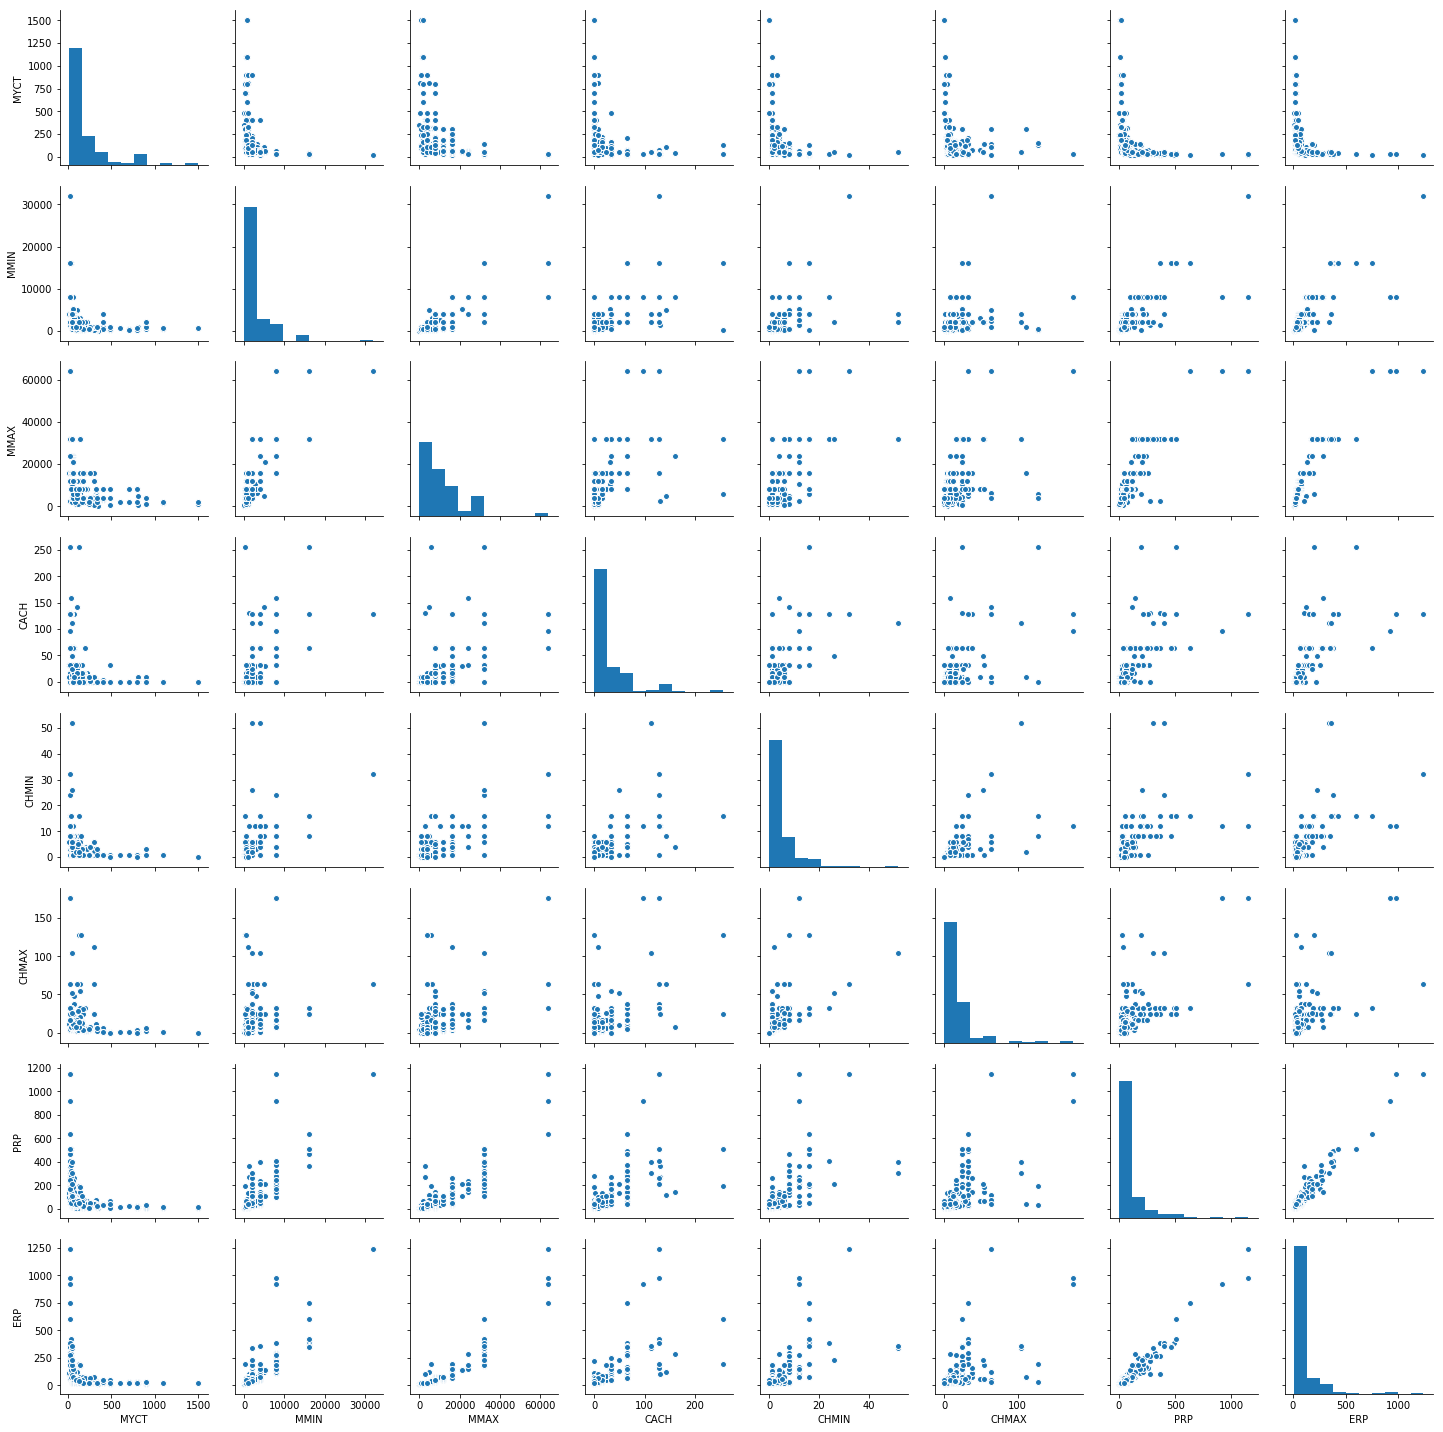

In [10]:
sns.pairplot(df)

In [11]:
df.loc[(df['PRP'] >= 0) & (df['PRP'] <= 20),'PRP'] = -1
df.loc[(df['PRP'] >= 21) & (df['PRP'] <= 100),'PRP'] = -2
df.loc[(df['PRP'] >= 101) & (df['PRP'] <= 200),'PRP'] = -3
df.loc[(df['PRP'] >= 201) & (df['PRP'] <= 300),'PRP'] = -4
df.loc[(df['PRP'] >= 301) & (df['PRP'] <= 400),'PRP'] = -5
df.loc[(df['PRP'] >= 401)& (df['PRP'] <= 500),'PRP'] = -6
df.loc[(df['PRP'] >= 501) & (df['PRP'] <= 600),'PRP'] = -7
df.loc[df['PRP'] >= 601,'PRP'] = -8

In [12]:
df.loc[df['PRP'] == -1, 'PRP'] = 1
df.loc[df['PRP'] == -2, 'PRP'] = 2
df.loc[df['PRP'] == -3, 'PRP'] = 3
df.loc[df['PRP'] == -4, 'PRP'] = 4
df.loc[df['PRP'] == -5, 'PRP'] = 5
df.loc[df['PRP'] == -6, 'PRP'] = 6
df.loc[df['PRP'] == -7, 'PRP'] = 7
df.loc[df['PRP'] == -8, 'PRP'] = 8

In [13]:
df = df[['PRP', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP']]

In [14]:
df['PRP'] = df['PRP'].astype(int)

In [15]:
df.sample(3)

,PRP,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
157,1,112,1000,1000,0,1,4,19
163,2,56,4000,12000,0,1,8,62
81,2,300,1000,4000,8,3,64,30


In [16]:
vectors = df.values
dataset = LabeledSet(7)
dataset.addExamples(vectors[:,1:], vectors[:,0:1])

In [17]:
NMI1(dataset)

0.0012881854987118145

In [18]:
folds = get_folds(dataset, 2)

In [19]:
nb_folds = 2

In [20]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

# pessimistic rank discrimination measure
f_p = Mindsr()
g_p = Frac() 
prdm = Gdm(h, g_p, f_p)

# rank Gini discrimination measure 
g_g = One_minus()
rgdm = Gdm(h, g_g, f_r)

# Gini discrimination measure
gdm = Gdm(h, g_g, f)

# H_M
h_m = Max()
g_m = One_minus_square()
H_m = Gdm(h_m, g_m, f_r)

# H_Q
f_q = Avgdsr()
h_q = Square_root()
H_q = Gdm(h_q, g_g, f_q)

In [21]:
acc_list = []
std_acc_list = []
depth_list = []
std_depth_list = []
leaves_list =  []
std_leaves_list = []
ratio_list = []
std_ratio_list = []
pairs_list = []
std_pairs_list = []
evaluations_list = []
std_eval_list = []
pratio_list = []
std_pratio_list = []
nb_examples_list = []
std_nb_examples_list = []

In [22]:
nb_folds = 2

In [23]:
# Rank Shannon discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(7)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(rsdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3, 4, 5, 6, 7, 8])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [24]:
# Shannon entropy 
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(7)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(sdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3, 4, 5, 6, 7, 8])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [25]:
# Rank Gini discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(7)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(rgdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3, 4, 5, 6, 7, 8])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [26]:
# Gini discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(7)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(gdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3, 4, 5, 6, 7, 8])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [27]:
# Pessimistic rank discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(7)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(prdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3, 4, 5, 6, 7, 8])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [28]:
# H_M
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(7)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(H_m, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3, 4, 5, 6, 7, 8])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [29]:
# H_Q
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(7)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(H_q, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3, 4, 5, 6, 7, 8])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [30]:
s_cci = ""
for i in range(7):
    s_cci += "& " + "{0:.2f}".format(acc_list[i] * 100) + " \% $\pm$ " + "{0:.2f}".format(std_acc_list[i]) + " \% "

s_depth = ""
for i in range(7):
    s_depth += "& " + "{0:.2f}".format(depth_list[i]) + " $\pm$ " + "{0:.2f}".format(std_depth_list[i]) + ""

s_leaves = ""
for i in range(7):
    s_leaves += "& " + "{0:.2f}".format(leaves_list[i]) + " $\pm$ " + "{0:.2f}".format(std_leaves_list[i]) + ""

s_ratio = ""
for i in range(7):
    s_ratio += "& " + "{0:.2f}".format(ratio_list[i] * 100) + " \% $\pm$ " + "{0:.2f}".format(std_ratio_list[i] * 100) + " \%"
    
s_pairs = ""
for i in range(7):
    s_pairs += "& " + "{0:.2f}".format(pairs_list[i]) + " $\pm$ " + "{0:.2f}".format(std_pairs_list[i]) + ""

s_eval = ""
for i in range(7):
    s_eval += "& " + "{0:.2f}".format(evaluations_list[i]) + " $\pm$ " + "{0:.2f}".format(std_eval_list[i]) + ""

s_pratio = ""
for i in range(7):
    s_pratio += "& " + "{0:.2f}".format(pratio_list[i]) + " $\pm$ " + "{0:.2f}".format(std_pratio_list[i]) + ""

s_nb_examples = ""
for i in range(7):
    s_nb_examples += "& " + "{0:.2f}".format(nb_examples_list[i]) + " $\pm$ " + "{0:.2f}".format(std_nb_examples_list[i]) + ""

In [31]:
print("CCI ", s_cci)
print("avgDepth ", s_depth)
print("avgLeaves ", s_leaves)
print("avgRatio ", s_ratio)
print("avgNbPairs ", s_pairs)
print("avgEval ", s_eval)
print("avgPairRatio ", s_pratio)
print("avgNbExamples ", s_nb_examples)

CCI  & 68.40 \% $\pm$ 0.04 \% & 65.06 \% $\pm$ 0.03 \% & 66.48 \% $\pm$ 0.05 \% & 66.49 \% $\pm$ 0.04 \% & 66.99 \% $\pm$ 0.00 \% & 60.26 \% $\pm$ 0.06 \% & 67.93 \% $\pm$ 0.03 \% 
avgDepth  & 10.50 $\pm$ 0.50& 9.00 $\pm$ 0.00& 10.00 $\pm$ 1.00& 8.50 $\pm$ 0.50& 11.00 $\pm$ 0.00& 14.50 $\pm$ 0.50& 11.00 $\pm$ 1.00
avgLeaves  & 35.00 $\pm$ 2.00& 27.50 $\pm$ 3.50& 36.50 $\pm$ 2.50& 28.50 $\pm$ 4.50& 36.50 $\pm$ 0.50& 41.50 $\pm$ 1.50& 40.50 $\pm$ 3.50
avgRatio  & 77.99 \% $\pm$ 0.11 \%& 86.00 \% $\pm$ 2.83 \%& 80.86 \% $\pm$ 1.05 \%& 81.80 \% $\pm$ 0.41 \%& 73.23 \% $\pm$ 4.66 \%& 70.73 \% $\pm$ 2.35 \%& 50.64 \% $\pm$ 16.03 \%
avgNbPairs  & 9.50 $\pm$ 0.50& 7.50 $\pm$ 1.50& 9.50 $\pm$ 0.50& 7.50 $\pm$ 1.50& 9.50 $\pm$ 0.50& 10.50 $\pm$ 0.50& 12.50 $\pm$ 1.50
avgEval  & 0.02 $\pm$ 0.00& 0.04 $\pm$ 0.02& 0.02 $\pm$ 0.00& 0.03 $\pm$ 0.01& 0.01 $\pm$ 0.00& 0.02 $\pm$ 0.00& 0.01 $\pm$ 0.00
avgPairRatio  & 0.28 $\pm$ 0.00& 0.28 $\pm$ 0.02& 0.27 $\pm$ 0.00& 0.27 $\pm$ 0.01& 0.27 $\pm$ 0.02& 0.